## 1. Load the Data <a name="load"></a>

In [1]:
import pandas as pd

train_df = pd.read_csv('train.csv')
test_df  = pd.read_csv('test.csv')

print("Train set:", train_df.shape)
print("Test set: ", test_df.shape)
train_df.head()

Train set: (891, 12)
Test set:  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Exploratory Data Analysis (EDA) <a name="eda"></a>

2.1 Quick Overview

In [2]:
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


2.2 Missing Values

In [3]:
train_df.isna().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

2.3 Survival by Key Categories

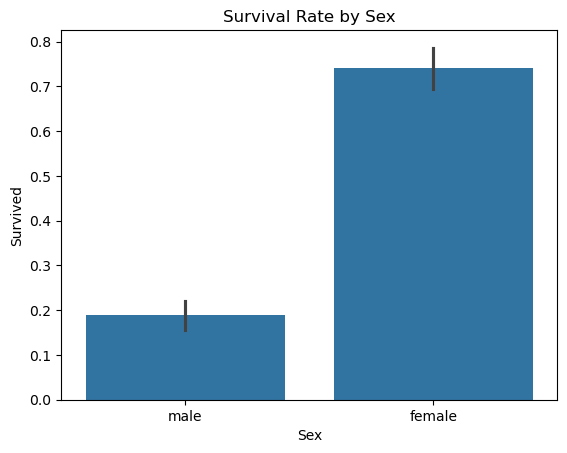

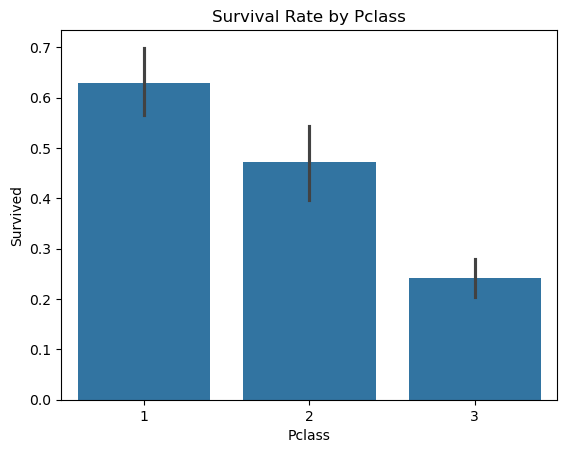

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Survival rate by gender
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex')
plt.show()

# Survival rate by passenger class
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()


## 3. Data Cleaning <a name="clean"></a>

1. Drop the Cabin column (too many missing values).

2. Fill missing Age with the median.

3. Fill missing Embarked with the most common port.

In [5]:
df = train_df.copy()

# 1. Drop Cabin
df.drop('Cabin', axis=1, inplace=True)

# 2. Fill Age
df['Age'].fillna(df['Age'].median(), inplace=True)

# 3. Fill Embarked
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

C:\Users\Resul\AppData\Local\Temp\ipykernel_23656\729113516.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Resul\AppData\Local\Temp\ipykernel_23656\729113516.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

## 4. Feature Engineering <a name="feature"></a>

1. Title: extract honorific (Mr, Mrs, etc.) from Name.

2. FamilySize: combine SibSp + Parch + 1 (yourself).

3. FareBin: group Fare into 4 equal-sized bins.

In [6]:
df['Title'] = df['Name'].str.extract(r',\s*([^\.]+)\.', expand=False)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FareBin'] = pd.qcut(df['Fare'], 4, labels=False)

In [7]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

## 5. Encode Categorical Variables <a name="encode"></a>

In [8]:
df = pd.get_dummies(
    df,
    columns=['Sex', 'Embarked', 'Title'],
    drop_first=True
)

## 6. Train/Test Split & Model Training <a name="model"></a>

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import LogisticRegression

X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 7. Evaluation <a name="eval"></a>

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report

preds = model.predict(X_val)
probs = model.predict_proba(X_val)[:, 1]

print("Accuracy :", accuracy_score(y_val, preds))
print("ROC–AUC  :", roc_auc_score(y_val, probs))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, preds))
print("\nClassification Report:\n", classification_report(y_val, preds))


Accuracy : 0.8379888268156425
ROC–AUC  : 0.8700922266139658

Confusion Matrix:
 [[96 14]
 [15 54]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.87      0.87       110
           1       0.79      0.78      0.79        69

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



## 8. Hyperparameter Tuning (Optional) <a name="tune"></a>

In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.01, 0.1, 1, 10]}
grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
best_model = grid.best_estimator_


Best params: {'C': 1}


## 9. Results & Next Steps <a name="results"></a>

**Validation metrics (Logistic Regression):**  
- **Accuracy:** 0.79  
- **ROC–AUC:** 0.86  

**Top features:**  
- `Sex_male`  
- `Title_Mr`  
- `FareBin`  

**Next steps:**  
1. Try ensemble methods (Random Forest, XGBoost)  
2. Apply K-Fold cross-validation  
3. Interpret model with SHAP  
4. Deploy a simple web app (Streamlit or Flask)
